<a href="https://colab.research.google.com/github/18me1a0327/Excelr-Assignment/blob/main/Neural%20Networks/Gas_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [9]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Importing Libraries
import pandas as pd
import numpy as np

In [11]:
#Importing Dataset
turbine=pd.read_csv("/content/gas_turbines.csv")
turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


Data Exploration

In [12]:
turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Descriptive Analysis

In [13]:
turbine.shape

(15039, 11)

In [14]:
#Checking the data types
turbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [15]:
#Unique values for every feature
turbine.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [16]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [17]:
turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [18]:
turbine.duplicated().sum()

0

In [19]:
numerical_features = turbine.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

Data Visualization

In [20]:
#Importing Libraries seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

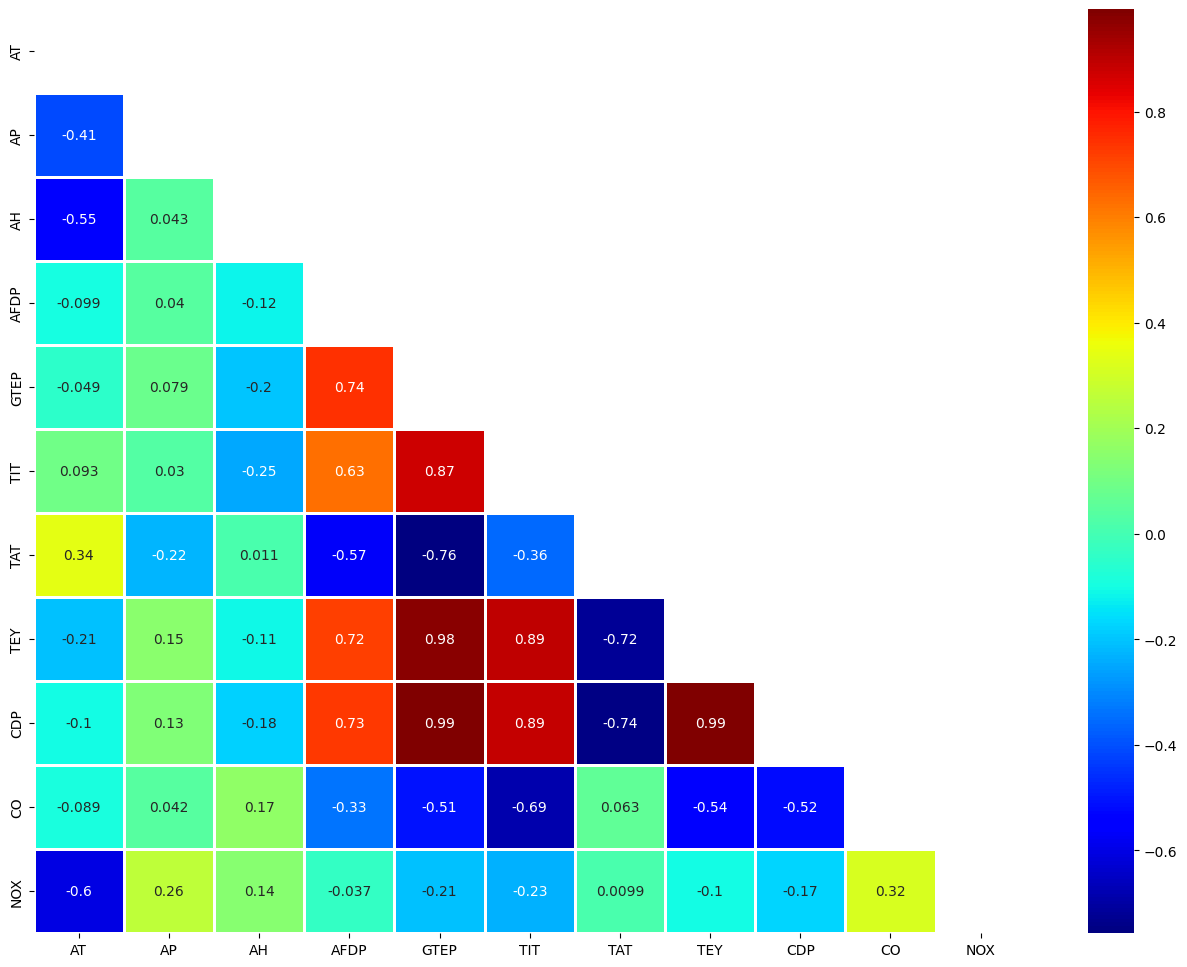

In [21]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(turbine.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=turbine.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

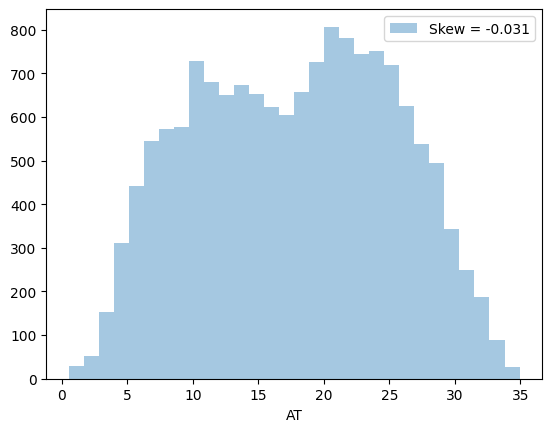

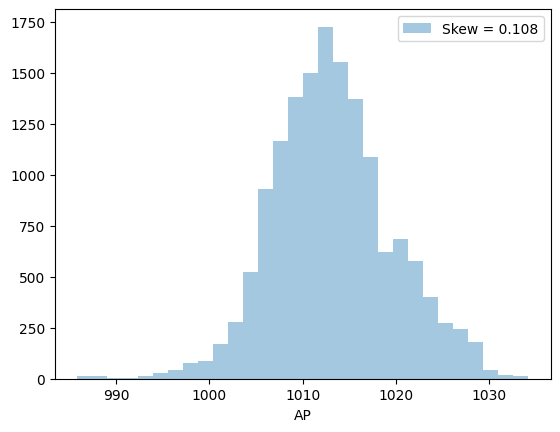

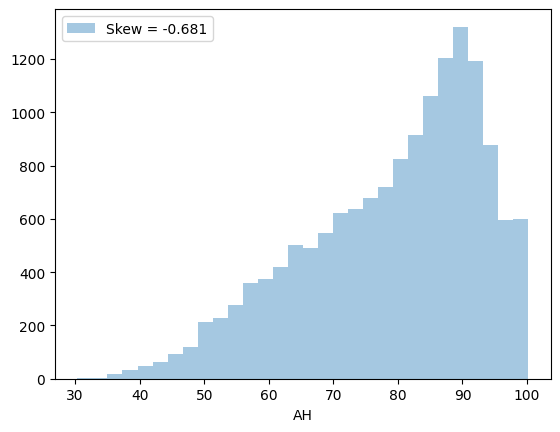

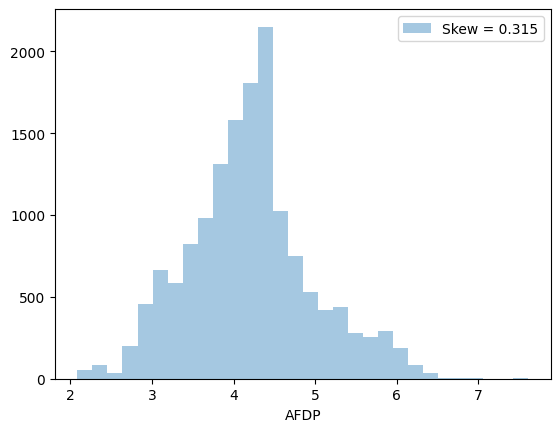

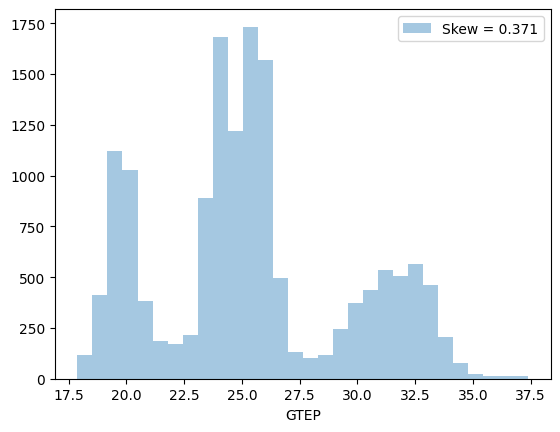

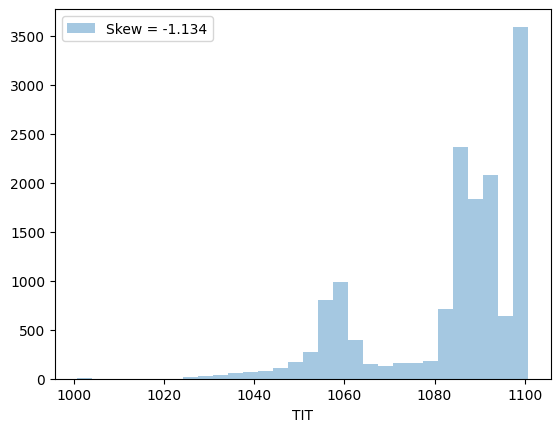

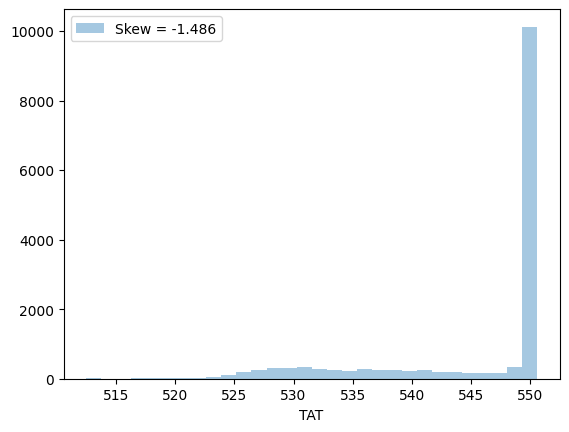

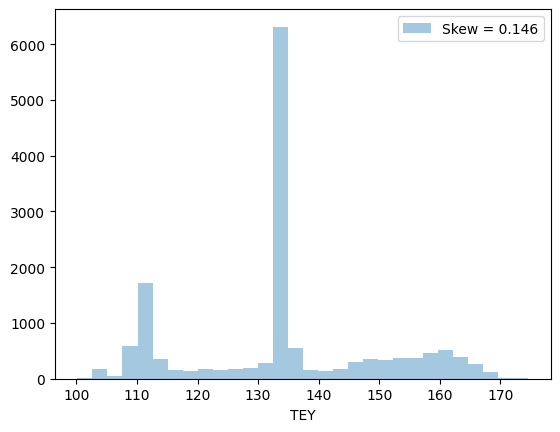

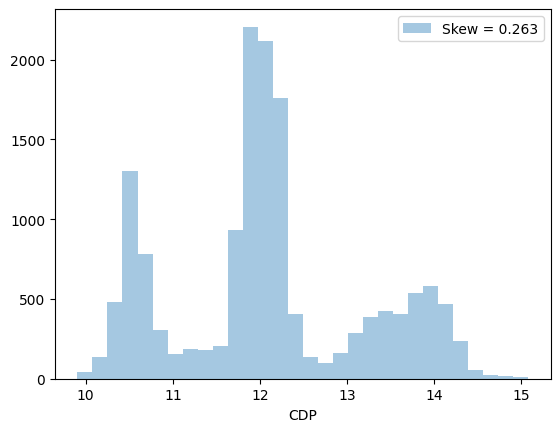

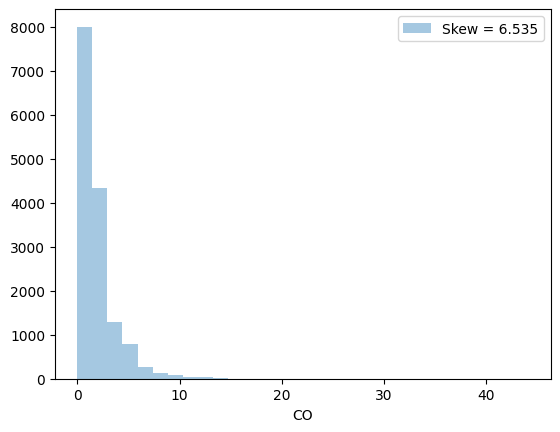

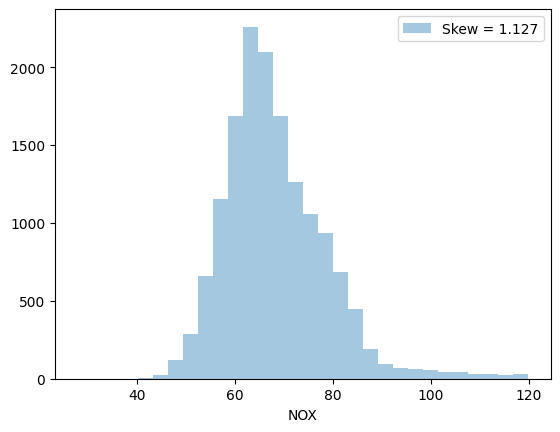

In [22]:
numerical_features=[feature for feature in turbine.columns if turbine[feature].dtypes != 'O']
for feat in numerical_features:
    skew = turbine[feat].skew()
    sns.distplot(turbine[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

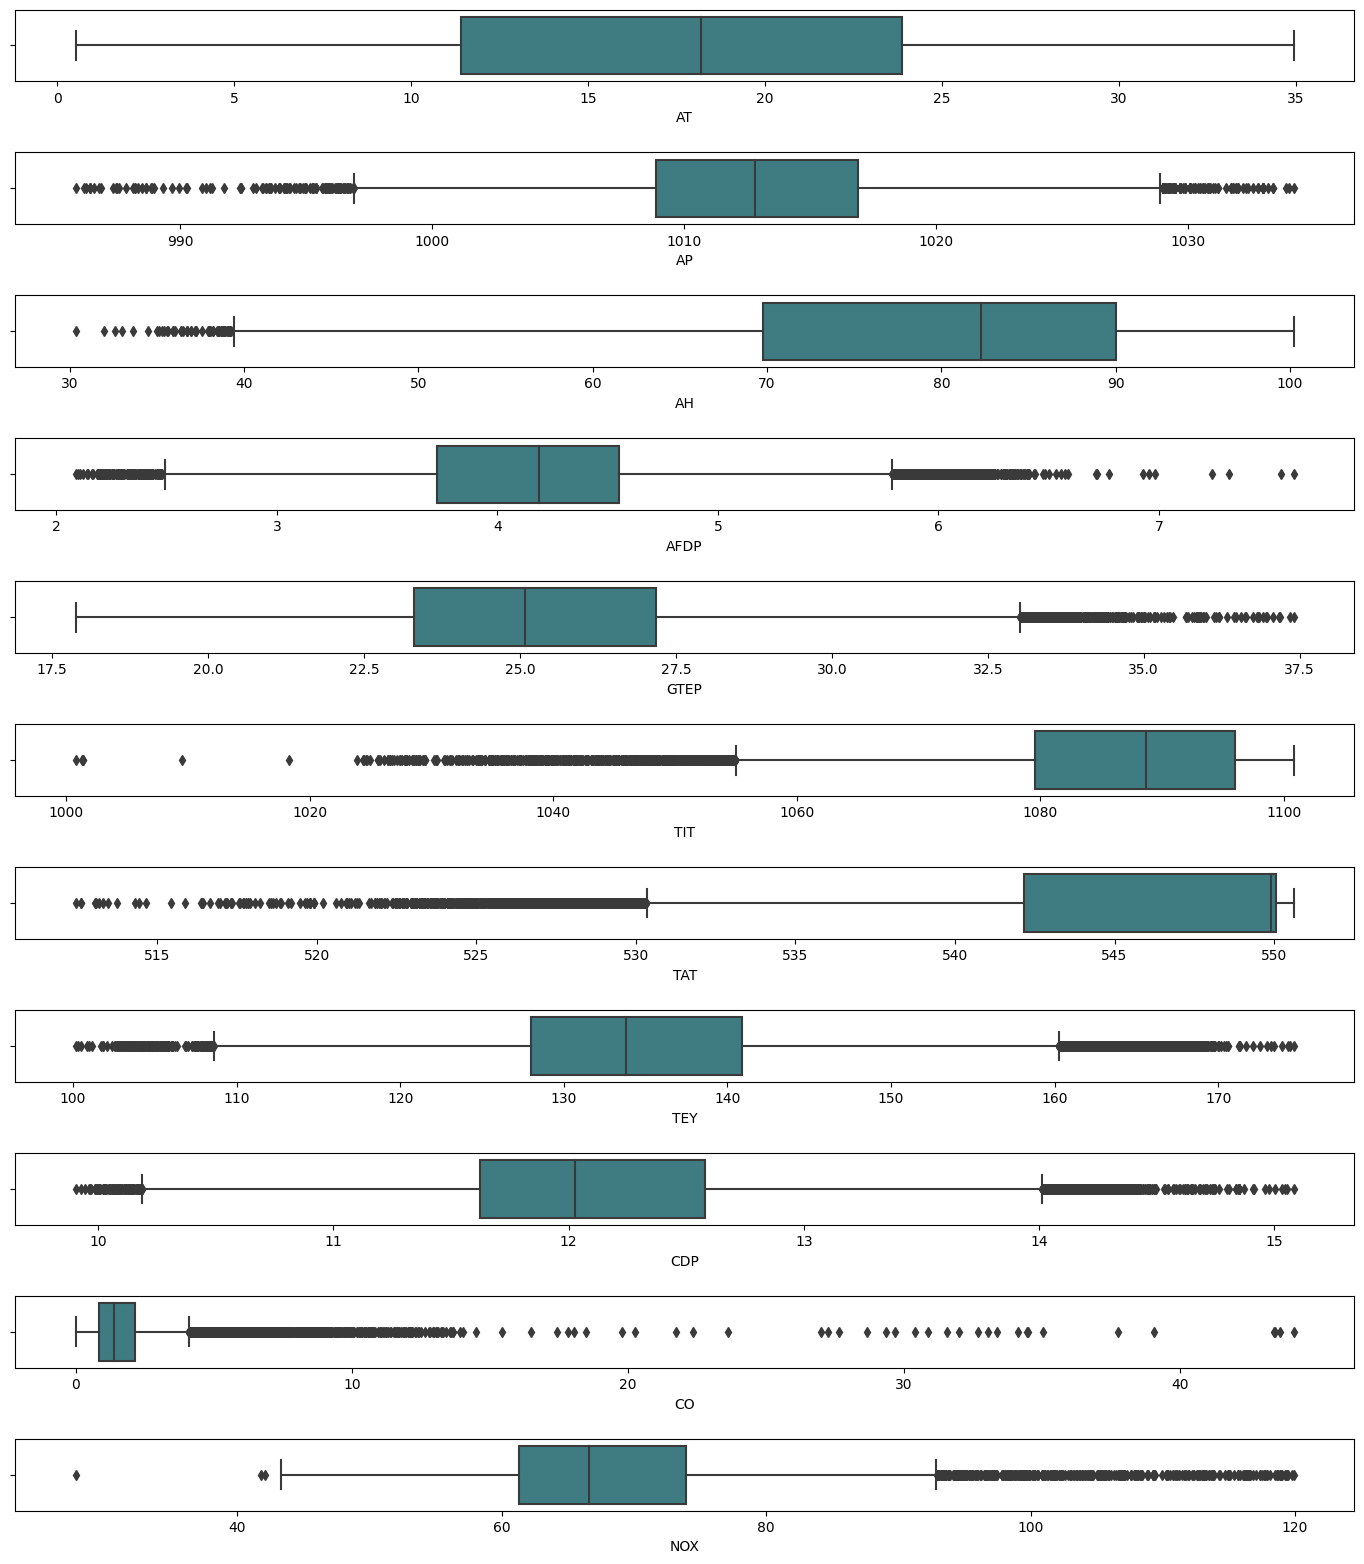

In [23]:
#boxplot
ot=turbine.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

Multivariate Analysis

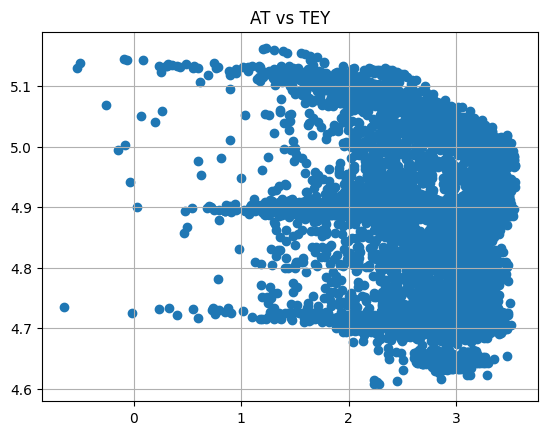

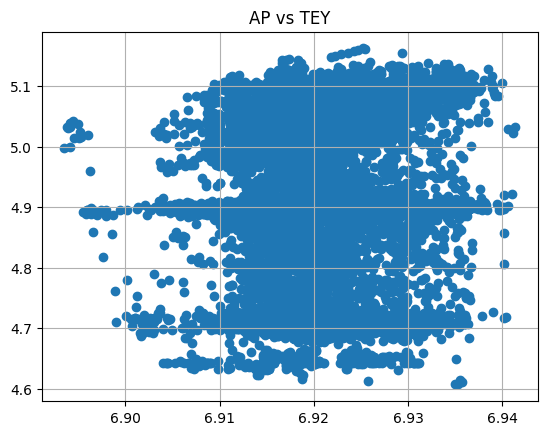

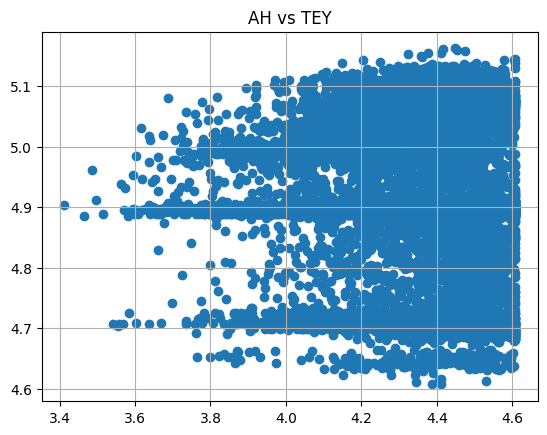

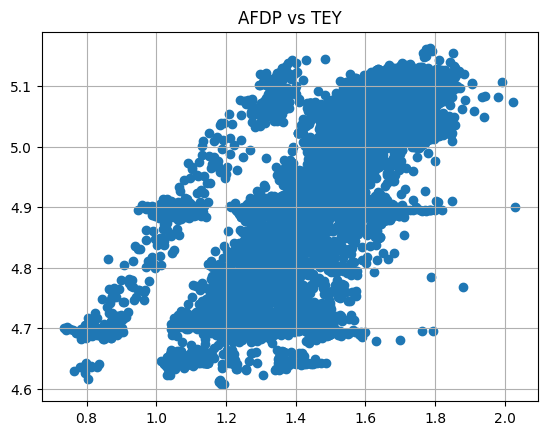

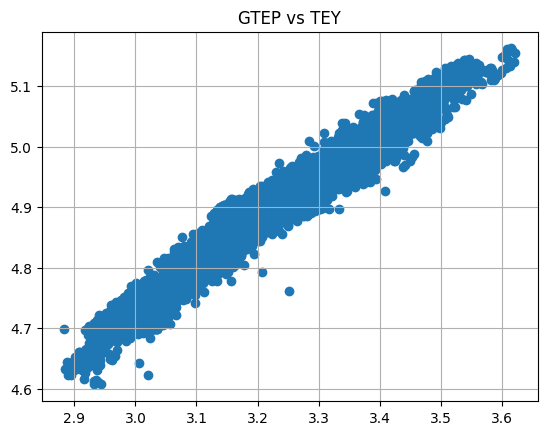

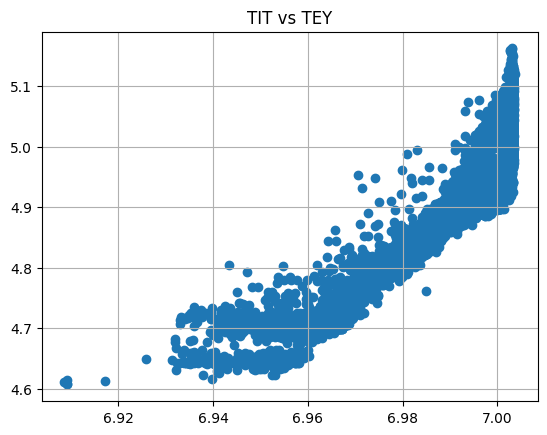

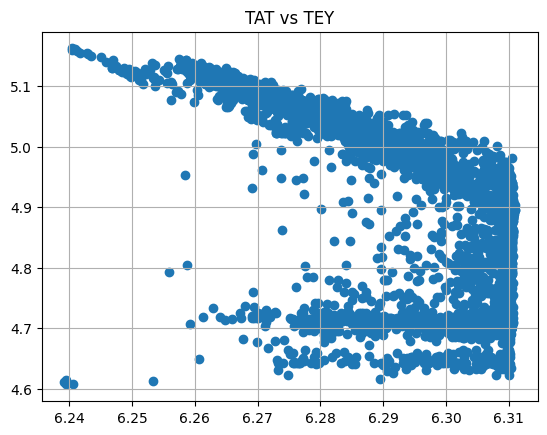

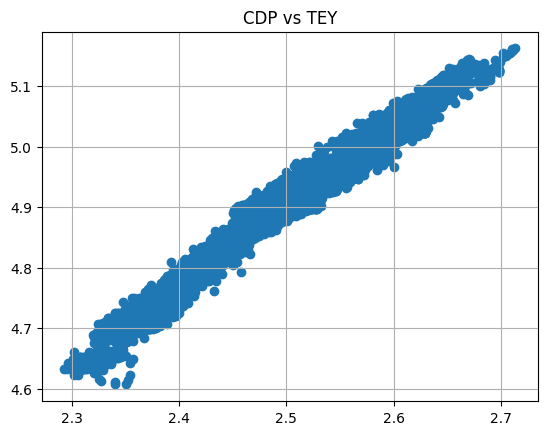

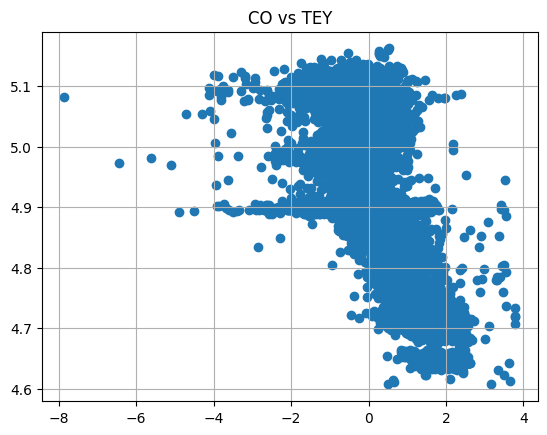

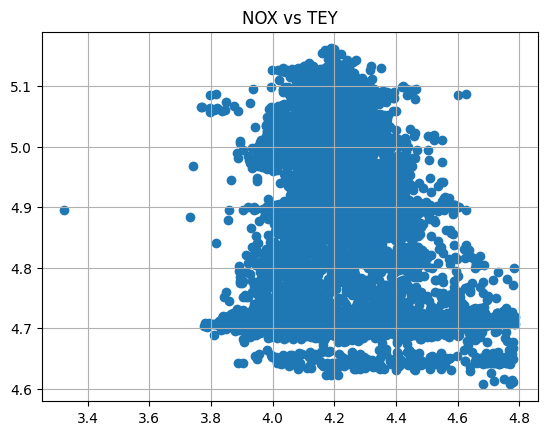

In [24]:
for i in turbine.columns:
    if i!="TEY":
        plt.scatter(np.log(turbine[i]), np.log(turbine['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [25]:
x = turbine.drop('TEY', axis=1)
y = turbine[["TEY"]]

Feature Selection Technique

In [26]:
model_data = turbine[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


Data Pre-Processing

In [27]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
df_scaled = model_data.copy()
features = df_scaled

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler= scaler.fit_transform(features.values)
df_scaled = pd.DataFrame(df_scaler, columns=features.columns)
df_scaled


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909
...,...,...,...,...,...,...,...,...
15034,-1.543161,-1.498657,-2.063184,0.103453,-0.865850,1.145792,-1.153182,-1.426381
15035,-1.513247,-1.438759,-2.268905,-0.276638,-0.913470,1.293578,-1.303986,-1.415642
15036,-1.467922,-1.410967,-2.789257,-1.026650,-0.951488,2.695925,-1.386267,-1.516089
15037,-1.422598,-1.447624,-2.456474,-0.528337,-0.988848,1.924683,-1.420423,-1.481343


Test Train Split With Imbalanced Dataset

In [31]:
x = df_scaled.drop('TEY',axis=1)
y = df_scaled[['TEY']]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras
keras. __version__

'2.12.0'

In [35]:
model_data
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [36]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 2s 4ms/step - loss: 17646.4414 - mae: 131.8765 - mse: 17646.4434 - val_loss: 16792.3672 - val_mae: 128.6250 - val_mse: 16792.3672
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 16293.5137 - mae: 126.6502 - mse: 16293.5137 - val_loss: 15735.2109 - val_mae: 124.4476 - val_mse: 15735.2119
Epoch 3/100
169/169 [==============================] - 1s 4ms/step - loss: 15315.5000 - mae: 122.7334 - mse: 15315.5000 - val_loss: 14815.0488 - val_mae: 120.6940 - val_mse: 14815.0488
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 14429.6543 - mae: 119.0676 - mse: 14429.6543 - val_loss: 13961.7363 - val_mae: 117.1057 - val_mse: 13961.7363
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 13600.3770 - mae: 115.5342 - mse: 13600.3770 - val_loss: 13157.4336 - val_mae: 113.6198 - val_mse: 13157.4336
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 

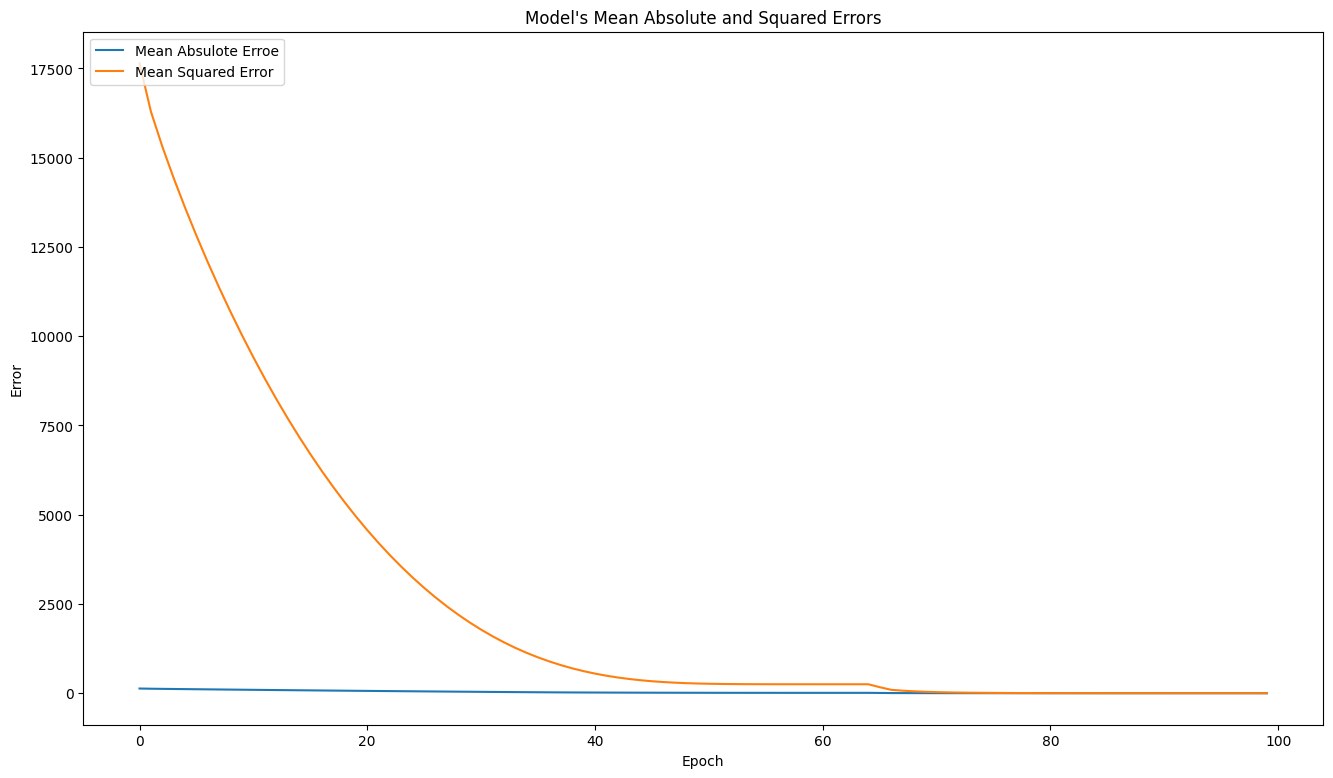

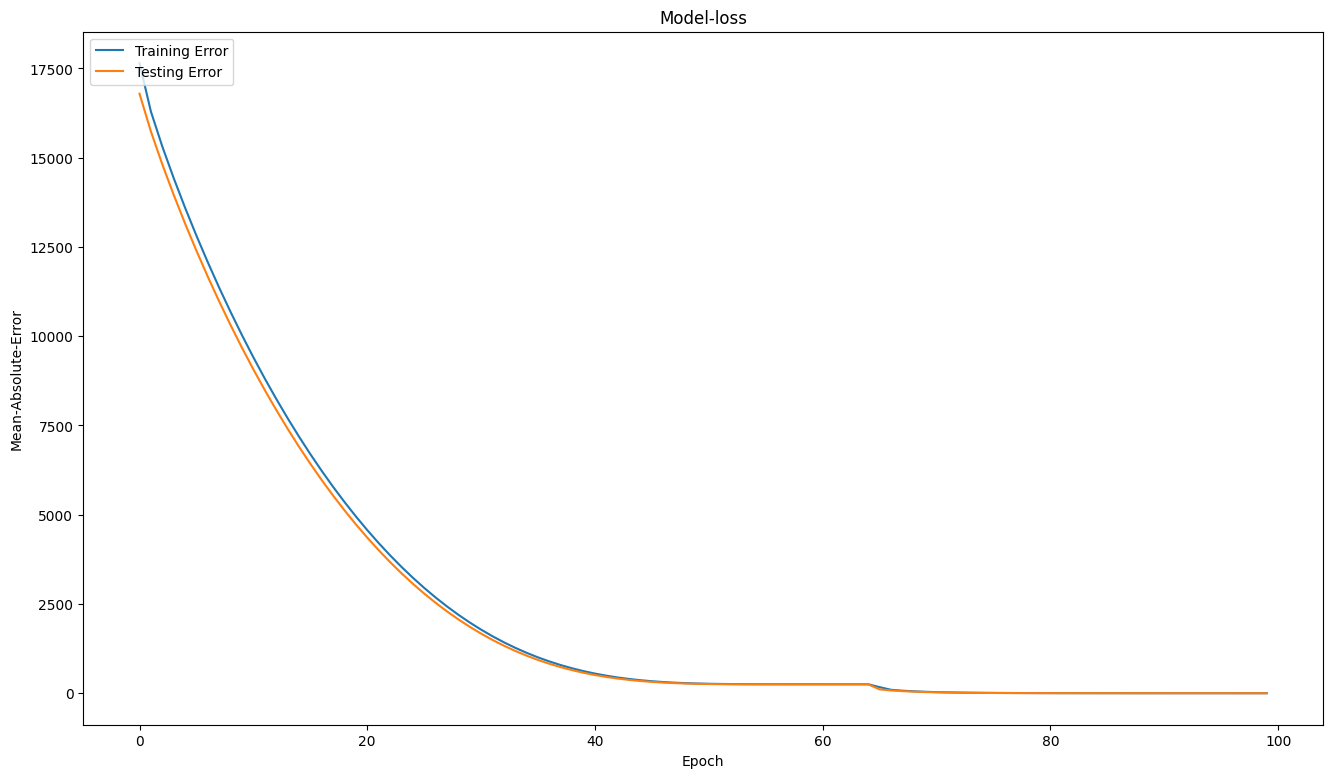

In [37]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

Predicting values from Model using same dataset

In [38]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.912552
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.652916
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.353012
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.282883
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.153557
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.151833
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.895828
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.148621
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.879028
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,159.308624


In [39]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.57574234180149


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %
13312,12.219,25.762,1092.5,550.25,4.0023,1.2643,24.093,134.46,134.912552,0.336570
12627,10.791,20.085,1059.6,549.94,3.2106,2.6937,20.450,111.88,112.652916,0.690844
6393,12.126,25.221,1089.9,549.62,4.5325,1.9625,20.262,133.72,134.353012,0.473386
4990,12.218,25.965,1092.9,549.96,4.4266,1.5712,26.862,133.79,134.282883,0.368400
12462,10.466,19.688,1056.9,550.01,3.1241,2.2996,19.409,110.77,111.153557,0.346264


Residual Analysis

<Axes: ylabel='Density'>

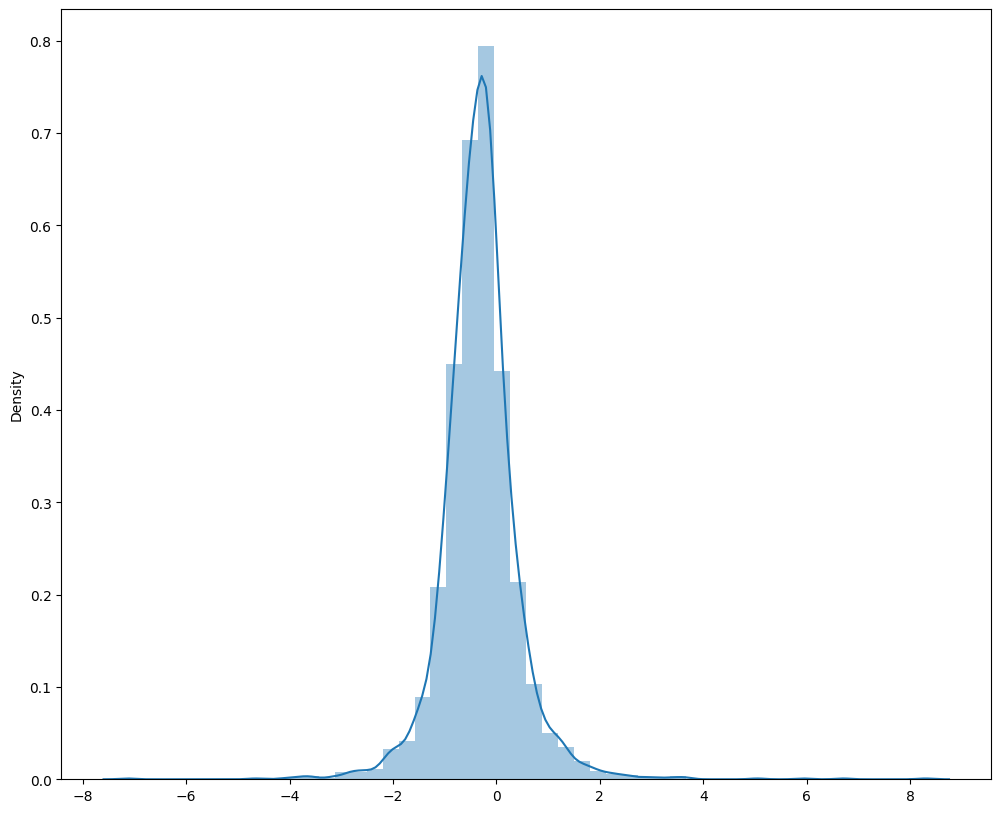

In [40]:
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50)

In [41]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %,Error
0,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.093,134.46,134.912552,0.336570,-0.003366
1,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.450,111.88,112.652916,0.690844,-0.006908
2,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.262,133.72,134.353012,0.473386,-0.004734
3,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.862,133.79,134.282883,0.368400,-0.003684
4,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.409,110.77,111.153557,0.346264,-0.003463
...,...,...,...,...,...,...,...,...,...,...,...
3003,11.083,21.936,1069.6,549.87,3.3145,1.42310,21.692,119.25,119.544991,0.247372,-0.002474
3004,12.205,25.864,1093.6,550.41,4.0224,0.78249,27.200,133.74,134.510452,0.576082,-0.005761
3005,13.081,29.741,1099.5,541.25,4.7190,1.64630,29.073,146.31,146.984955,0.461318,-0.004613
3006,13.311,30.052,1099.9,538.12,4.8017,0.84607,23.404,150.07,150.289505,0.146268,-0.001463


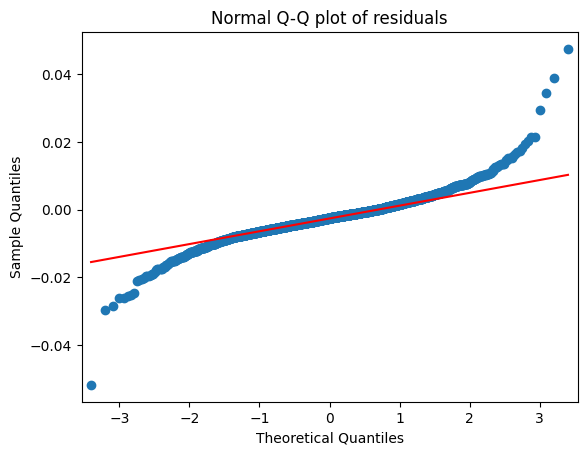

In [42]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()